In [77]:
import os
import sys; sys.path.append("~/HHbbgg_ETH/Training/python") # to load packages
import training_utils as utils
reload(utils)

<module 'training_utils' from '/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/Training/python/training_utils.pyc'>

In [78]:
ntuples = '20170509'
# "%" sign allows to interpret the rest as a system command
print utils.IO.ldata
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "NonRes" in s]
background = [s for s in files if "DiPhotonJets" in s]

utils.IO.set_signal_and_background(ntuples,signal,background)

print "using background file:"+utils.IO.backgroundName
print "using signal file:"+utils.IO.signalName

/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/
env: data=/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170509
using background file:/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170509/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
using signal file:/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170509/AllNonResSig.root


In [79]:
import numpy as np

In [80]:
#normal variables: int, float, vectors...
branch_names = 'npu,genTotalWeight'.split(",")
branch_names = [c.strip() for c in branch_names]
branch_names = (b.replace(" ", "_") for b in branch_names)
branch_names = list(b.replace("-", "_") for b in branch_names)

#tlorentz vectors
branch_names_lorentz = 'leadingJet,leadingPhoton'.split(",")
branch_names_lorentz = [c.strip() for c in branch_names_lorentz]
branch_names_lorentz = (b.replace(" ", "_") for b in branch_names_lorentz)
branch_names_lorentz = list(b.replace("-", "_") for b in branch_names_lorentz)
print branch_names_lorentz

#variables we want to access in tlorenz vector
branch_names_lorentz_var = 'Pt(),Eta()'.split(",")
branch_names_lorentz_var = [c.strip() for c in branch_names_lorentz_var]
branch_names_lorentz_var = (b.replace(" ", "_") for b in branch_names_lorentz_var)
branch_names_lorentz_var = list(b.replace("-", "_") for b in branch_names_lorentz_var)
print branch_names_lorentz_var

['leadingJet', 'leadingPhoton']
['Pt()', 'Eta()']


In [81]:
import pandas as pd
import root_pandas as rpd
reload(rpd)

# doesn't work the alias bbggSelectionTree.SetAlias("leadingJetPt","leadingJet.Pt()")
#signal_df = rpd.read_root("prova.root","daje", columns = branch_names) 

#the method read_root_LorentzVectior is my modified version of root_pandas library,
#the files can be found here ~/HHbbgg_ETH/Training/python/root_pandas_modified/
#and should be copied in the correct location for your root_pandas installation
#like /mnt/t3nfs01/data01/shome/micheli/.local/lib/python2.7/site-packages/root_pandas/

signal_df = rpd.read_root_LorentzVector(signalName,"bbggSelectionTree", columns = branch_names, columns_lorentz=branch_names_lorentz,columns_lorentz_var=branch_names_\
lorentz_var)
background_df = rpd.read_root_LorentzVector(backgroundName,"bbggSelectionTree", columns = branch_names, columns_lorentz=branch_names_lorentz,columns_lorentz_var=branch_names_\
lorentz_var)
import numpy as np
#example for converting files into csv. useful for plotting
signal_df.to_csv('/tmp/micheli/prova.csv',',',mode='w')


#signal_df = pd.root2array(signalName, "bbggSelectionTree", branch_names)

leadingJet
leadingJet
leadingPhoton
leadingPhoton
['genWeights', 'genTotalWeight', 'gen_mHH', 'gen_cosTheta', 'gen_NRW', 'leadingPhoton', 'leadingPhotonID', 'leadingPhotonISO', 'leadingPhotonEVeto', 'leadingPhotonIDMVA', 'customLeadingPhotonIDMVA', 'leadingPhotonR9full5x5', 'leadingPhotonHasGain1', 'leadingPhotonHasGain6', 'subleadingPhoton', 'subleadingPhotonID', 'subleadingPhotonISO', 'subleadingPhotonEVeto', 'subleadingPhotonIDMVA', 'customSubLeadingPhotonMVA', 'subleadingPhotonR9full5x5', 'subLeadingPhotonHasGain1', 'subLeadingPhotonHasGain6', 'diphotonCandidate', 'nPromptInDiPhoton', 'leadingJet', 'leadingJet_KF', 'leadingJet_Reg', 'leadingJet_RegKF', 'leadingJet_bDis', 'leadingJet_CSVv2', 'leadingJet_cMVA', 'leadingJet_flavour', 'leadingJet_hadFlavour', 'subleadingJet', 'subleadingJet_KF', 'subleadingJet_Reg', 'subleadingJet_RegKF', 'subleadingJet_bDis', 'subleadingJet_CSVv2', 'subleadingJet_cMVA', 'subleadingJet_flavour', 'subleadingJet_hadFlavour', 'dijetCandidate', 'dijetCandi

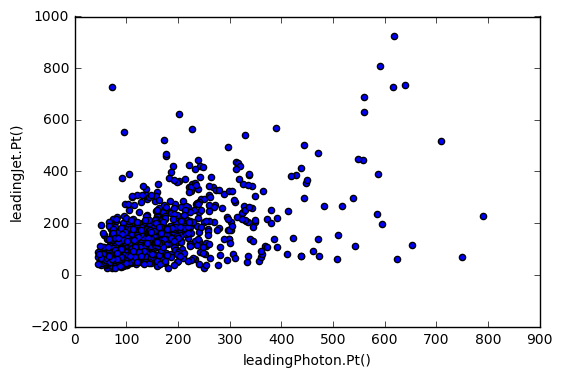

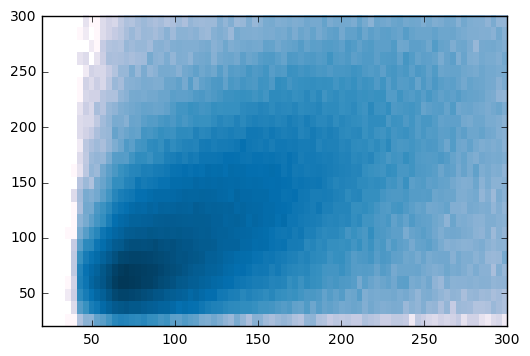

In [15]:
import random
import matplotlib.pyplot as plt
#plot 1000 data points at random
signal_df.ix[random.sample(signal_df.index, 1000)].plot(kind='scatter',
                                          x='leadingPhoton.Pt()', y='leadingJet.Pt()')
plt.show()
from matplotlib.colors import LogNorm
plt.hist2d(x=signal_df['leadingPhoton.Pt()'],y=signal_df['leadingJet.Pt()'],
            range=[[20,300],[20,300]],bins=[80,25],norm=LogNorm(),cmap='PuBu')
plt.show()

In [71]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier(max_depth=5,learning_rate=0.2,n_estimators=100,min_weight_fraction_leaf=1e-4,verbose=1)
#clf = ensemble.AdaBoostClassifier(n_estimators=100)
reg = ensemble.GradientBoostingRegressor(max_depth=5,learning_rate=0.2,n_estimators=100,min_weight_fraction_leaf=1e-4)


#####
utils.preprocessing.adjust_and_compress(signal_df).to_hdf('/tmp/micheli/signal.hd5','qcd',compression=9,complib='bzip2',mode='w')
utils.preprocessing.adjust_and_compress(background_df).to_hdf('/tmp/micheli/signal.hd5','qcd',compression=9,complib='bzip2',mode='w')

#adding 1 for sig and 0 for bkg
utils.preprocessing.define_process_weight(signal_df,1,1)
utils.preprocessing.define_process_weight(background_df,0,1)


y_sig = signal_df[['proc']]
y_bkg = background_df[['proc']]
y_total_train = utils.preprocessing.get_total_training_sample(y_sig,y_bkg).ravel()
#y_total_train = np.concatenate([y_sig,y_bkg])

X_sig = signal_df[['leadingJet.Pt()','leadingPhoton.Pt()']]
X_bkg = background_df[['leadingJet.Pt()','leadingPhoton.Pt()']]
#get first half of sig and background sample
X_total_train = utils.preprocessing.get_total_training_sample(X_sig,X_bkg)


#print "total size:"+str(y_total_train.size)
#print "y_totalTrain:"
#print y_total_train
#print type(y_total_train)

#print "total size:"+str(X_total_train.size)
#print "xtotalTrain:"
#print X_total_train

#run classification
clf.fit(X_total_train,y_total_train)
#run regression
#reg.fit(X_total_train,y_total_train)

X_sig_train = utils.preprocessing.get_training_sample(X_sig)
X_bkg_train = utils.preprocessing.get_training_sample(X_bkg)

X_sig_test = utils.preprocessing.get_test_sample(X_sig)
X_bkg_test = utils.preprocessing.get_test_sample(X_bkg)

Y_pred_sig_train = clf.decision_function(X_sig_train).ravel()
Y_pred_bkg_train = clf.decision_function(X_bkg_train).ravel()
Y_pred_sig_test = clf.decision_function(X_sig_test).ravel()
Y_pred_bkg_test = clf.decision_function(X_bkg_test).ravel()

#Y_pred_sig_test = clf.predict(X_sig_test) # predict you get the class 0,1,1, predict_proba you get the classifier output
#Y_pred_sig_test = clf.predict_proba(X_sig_test)
#Y_pred_bkg_test = clf.predict_proba(X_bkg_test)

#print "x Train sig:"
#print X_sig_train
#print "x Train bkg:"
#print X_bkg_train


print Y_pred_sig_train

      Iter       Train Loss   Remaining Time 
         1           0.5928            2.02m
         2           0.5585            1.99m
         3           0.5371            1.96m
         4           0.5227            1.95m
         5           0.5126            1.99m
         6           0.5055            2.01m
         7           0.5004            1.99m
         8           0.4969            1.97m
         9           0.4942            1.95m
        10           0.4924            1.93m
        20           0.4875            1.68m
        30           0.4871            1.60m
        40           0.4869            1.33m
        50           0.4867            1.06m
        60           0.4866           50.17s
        70           0.4865           38.73s
        80           0.4864           25.16s
        90           0.4863           12.31s
       100           0.4861            0.00s
[ 0.85988438 -2.93406234 -0.40896542 ..., -2.83068771  0.68487804
 -0.75637176]


In [10]:
print X_test[:,0].ravel()
plt.hist2d(x=X_test[:,0].ravel(),y=Y_pred, range=[[20,400],[20,50]],bins=[80,25],norm=LogNorm(),cmap='PuBu')
plt.show()
plt.hist2d(x=X_train[:,0].ravel(),y=Y_train, range=[[20,400],[20,50]],bins=[80,25],norm=LogNorm(),cmap='PuBu')
plt.show()

[  61.87340164  164.72155762  103.69889831 ...,   49.01852798  109.16719055
   97.95415497]


NameError: name 'Y_pred' is not defined

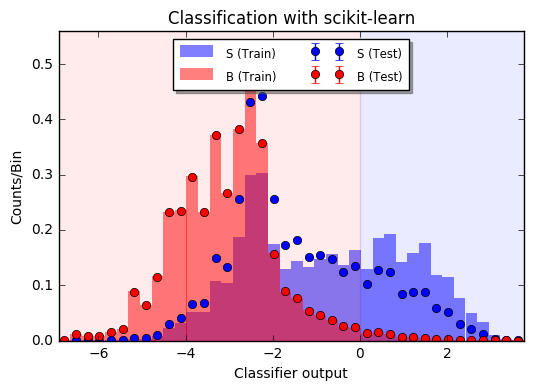

In [75]:
utils.plotting.plot_classifier_output(clf,X_sig_train,X_bkg_train,X_sig_test,X_bkg_test)

plt.show()

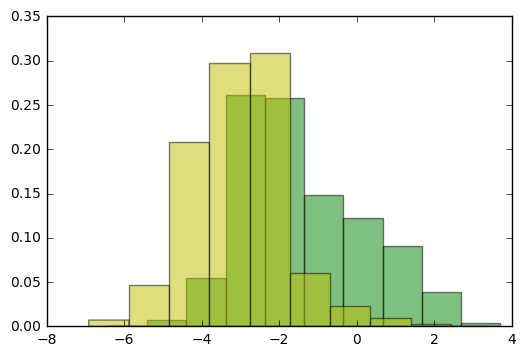

In [73]:
plt.hist(Y_pred_sig_test,color='g', alpha=0.5, 
             normed=True,
             label='S (test)')
plt.hist(Y_pred_bkg_test,color='y', alpha=0.5, 
             normed=True,
             label='B (test)')
plt.show()